[[14939960.  8725270.  6003720.  4784220.  5159810.  4019660.  5441290.]
 [ 6620230.  3990630.  3564260.  2911850.  2530910.  2444150.  2457990.]
 [ 5145580.  2838250.  2402730.  2080860.  2453330.  2423530.  2740510.]
 [ 3396030.  2258400.  2305250.  2019960.  2413790.  2841140.  2919390.]
 [ 2873970.  2011730.  1877910.  2232360.  2751230.  3270990.  4140560.]
 [ 2352930.  1732590.  1867730.  2461090.  3137040.  4157800.  4531540.]
 [ 1982760.  1639000.  2280970.  2747960.  3893150.  4389740.  5206380.]]


<IPython.core.display.Javascript object>


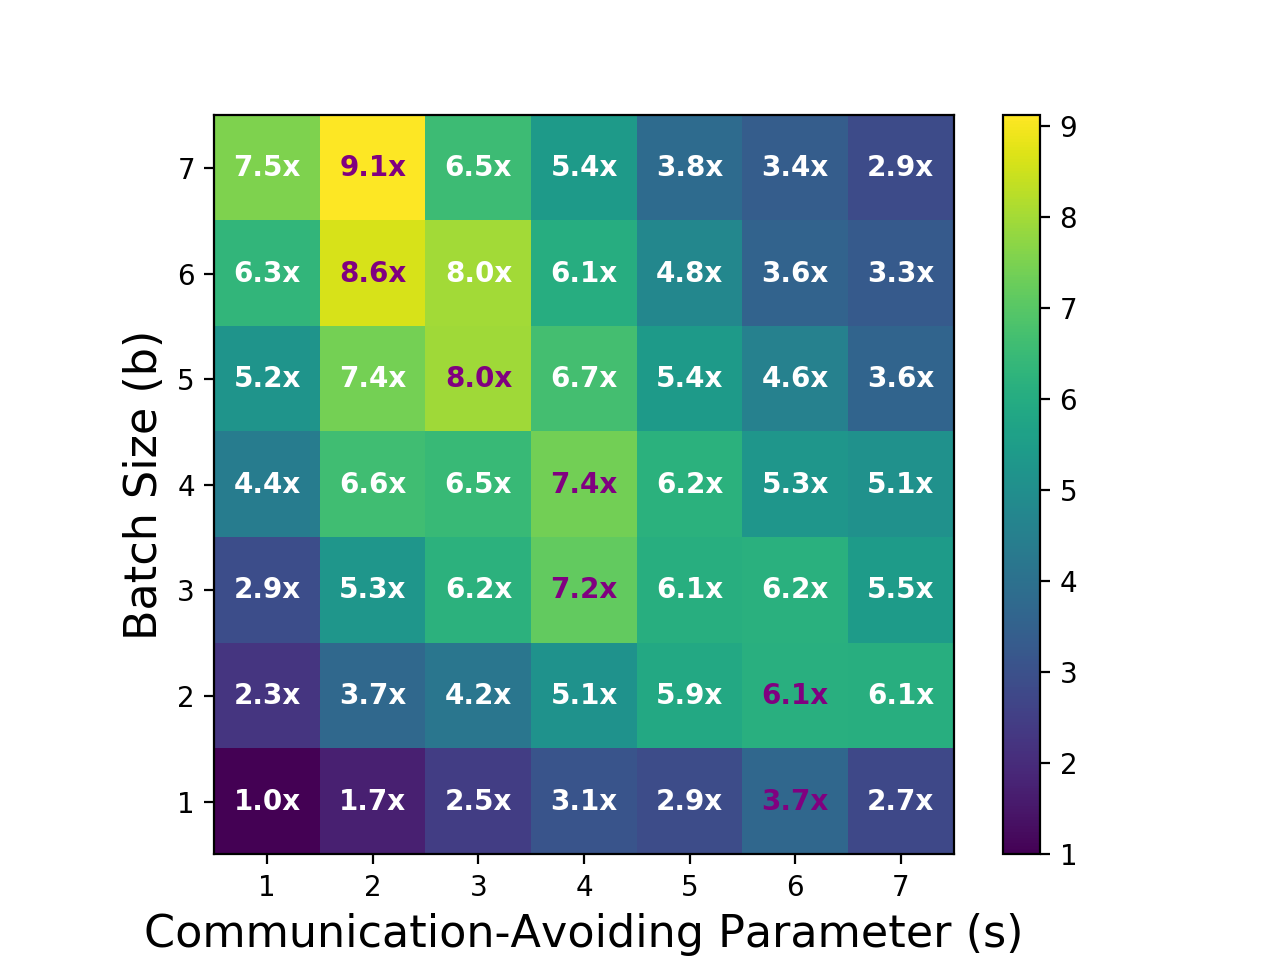

In [7]:
import os, sys

import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

def getAvgRunningTime(fname):
    file = open(fname, 'r')
    running_time = 0.
    for line in file:
        if 'average' in line:
            startidx = line.find(':')
            endidx = line.find('ms')
            running_time = float(line[startidx+1:endidx])
            break;
    file.close()
    return running_time


filepath = './sample_logs/url/heatmap_data/'

dataset ='url'
p = '384'
s = range(1, 8)
b = range(1, 8)
running_times = np.zeros((len(s), len(b)))
fname = ''

for i in b:
    for j in s:
        if j == 1:
            fname = dataset + '_p' + str(p) + '_b' + str(i) + '.log'
        else:
            fname = dataset + '_p' + str(p) + '_b' + str(i) + '_s' + str(j) + '.log'
        running_times[i-1, j-1] = getAvgRunningTime(filepath+fname)

print(running_times)
fig, ax = plt.subplots()
speedup = running_times[0,0]/running_times
im = ax.imshow(speedup, cmap='viridis', origin='lower')

fig.colorbar(im)
ax.set_xticklabels(np.arange(0,8))
ax.set_yticklabels(np.arange(0,8))

ax.set_ylabel('Batch Size (b)', fontsize=16)
ax.set_xlabel('Communication-Avoiding Parameter (s)', fontsize=16)
for i in range(len(b)):
    for j in range(len(s)):
        if speedup[i,j] in np.max(speedup, axis=1):
            text = ax.text(j, i, str(round(speedup[i, j], 1))+'x',
                       ha="center", va = "center", color="purple", fontweight='bold')
        else:
             text = ax.text(j, i, str(round(speedup[i, j], 1))+'x',
                       ha="center", va = "center", color="w", fontweight='bold')

fig.savefig('url_heatmap.pdf', dpi=300, bbox_inches='tight')